# USED CAR PRICE PREDICTION

PROBLEM DEFINATION

Determining whether the listed price of a used car is a challenging task, due to the many factors that drive
a used vehicle’s price on the market. The focus of this project is developing machine learning models that
can accurately predict the price of a used car based on its features, in order to make informed purchases.
We implement and evaluate various learning methods on a dataset consisting of the sale prices of
different makes and models across cities in the United States. Our results show that Random Forest
model and  linear regression yield the best results, but are compute heavy.
Conventional linear regression also yielded satisfactory results, with the advantage of a significantly lower
training time in comparison to the aforementioned methods.


# DATASET

We have found suitable datasets required for our project in Kaggle website.
The data set is about the various features regarding for a car price such as brand,price,mileage,fuel type,year of purchase etc.., The data sets are being used for various type of car brands and various type of fuel such as petrol,diesel,CNG etc.., 

# PREPARE THE DATA

In [2]:
#importing essential libraries
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [3]:
data=pd.read_csv('car_price.csv')

In [4]:
data.head()

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model
0,BMW,4200.0,sedan,277,2.0,Petrol,yes,1991,320
1,Mercedes-Benz,7900.0,van,427,2.9,Diesel,yes,1999,Sprinter 212
2,Mercedes-Benz,13300.0,sedan,358,5.0,Gas,yes,2003,S 500
3,Audi,23000.0,crossover,240,4.2,Petrol,yes,2007,Q7
4,Toyota,18300.0,crossover,120,2.0,Petrol,yes,2011,Rav 4


# DATA PRE-PROCESSING

In [5]:
data.describe(include='all')

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model
count,4345,4173.000000,4345,4345.000000,4195.000000,4345,4345,4345.000000,4345
unique,7,NaN,6,NaN,NaN,4,2,NaN,312
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN,E-Class
freq,936,NaN,1649,NaN,NaN,2019,3947,NaN,199
mean,NaN,19418.746935,NaN,161.237284,2.790734,NaN,NaN,2006.550058,NaN
std,NaN,25584.242620,NaN,105.705797,5.066437,NaN,NaN,6.719097,NaN
min,NaN,600.000000,NaN,0.000000,0.600000,NaN,NaN,1969.000000,NaN
25%,NaN,6999.000000,NaN,86.000000,1.800000,NaN,NaN,2003.000000,NaN
50%,NaN,11500.000000,NaN,155.000000,2.200000,NaN,NaN,2008.000000,NaN
75%,NaN,21700.000000,NaN,230.000000,3.000000,NaN,NaN,2012.000000,NaN


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4345 entries, 0 to 4344
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Brand         4345 non-null   object 
 1   Price         4173 non-null   float64
 2   Body          4345 non-null   object 
 3   Mileage       4345 non-null   int64  
 4   EngineV       4195 non-null   float64
 5   Engine Type   4345 non-null   object 
 6   Registration  4345 non-null   object 
 7   Year          4345 non-null   int64  
 8   Model         4345 non-null   object 
dtypes: float64(2), int64(2), object(5)
memory usage: 305.6+ KB


In [7]:
df=data.drop(labels='Model',axis=1)

In [8]:
df.head()

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year
0,BMW,4200.0,sedan,277,2.0,Petrol,yes,1991
1,Mercedes-Benz,7900.0,van,427,2.9,Diesel,yes,1999
2,Mercedes-Benz,13300.0,sedan,358,5.0,Gas,yes,2003
3,Audi,23000.0,crossover,240,4.2,Petrol,yes,2007
4,Toyota,18300.0,crossover,120,2.0,Petrol,yes,2011


In [9]:
#checking for any missing values in dataset and treating it

In [10]:
df.isna().sum()

Brand             0
Price           172
Body              0
Mileage           0
EngineV         150
Engine Type       0
Registration      0
Year              0
dtype: int64

In [11]:
df1=df.dropna()

In [12]:
df1.isna().sum()

Brand           0
Price           0
Body            0
Mileage         0
EngineV         0
Engine Type     0
Registration    0
Year            0
dtype: int64

# DATA EXPLORATION

Text(0.5, 1.0, 'Car Price Distribution Plot')

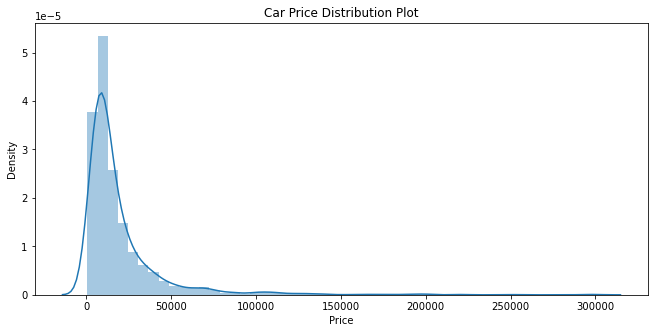

In [13]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
# This makes it very easy to spot anomalies, such as outliers
plt.figure(figsize=[11,5])
sns.distplot(df1['Price'])
plt.title('Car Price Distribution Plot')

Text(0.5, 1.0, 'EngineV Distribution Plot')

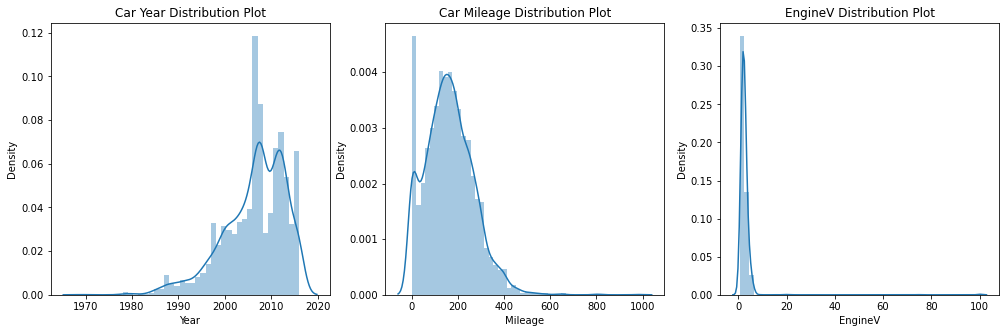

In [14]:
# car and mileage Distribution Plot
plt.figure(figsize=[17,5])
plt.subplot(1,3,1)
sns.distplot(df1['Year'])
plt.title('Car Year Distribution Plot')

plt.subplot(1,3,2)
sns.distplot(df1['Mileage'])
plt.title('Car Mileage Distribution Plot')

plt.subplot(1,3,3)
sns.distplot(df1['EngineV'])
plt.title('EngineV Distribution Plot')

In [15]:
#now we will deal with outliers in our data becuse they can increase the variability
# Here, the outliers are situated around the higher prices (right side of the graph)
# we can deal with the problem easily by removing 0.5%, or 1% of the problematic samples
# This is a dataset about used cars, therefore one can imagine how $300,000 is an excessive price
# Outliers are a great issue for Ordinary least squares, thus we must deal with them in some way
q = df1['Price'].quantile(0.99)
data_1 = df1[df1['Price']<q]

Text(0.5, 1.0, 'Car Price Distribution Plot')

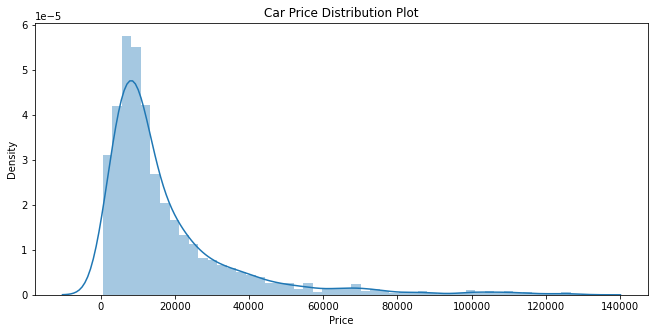

In [16]:
plt.figure(figsize=[11,5])
sns.distplot(data_1['Price'])
plt.title('Car Price Distribution Plot')

Text(0.5, 1.0, 'Car Mileage Distribution Plot')

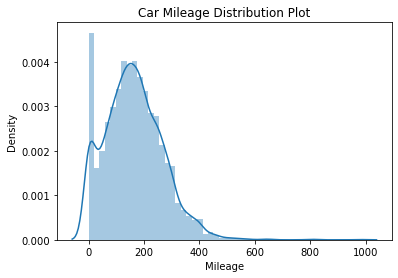

In [17]:
sns.distplot(df1['Mileage'])
plt.title('Car Mileage Distribution Plot')


In [18]:
q = data_1['Mileage'].quantile(0.99)
data_2 = data_1[data_1['Mileage']<q]

<AxesSubplot:xlabel='Mileage', ylabel='Density'>

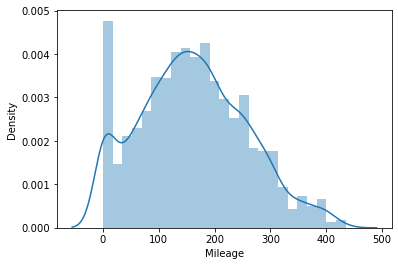

In [19]:
sns.distplot(data_2['Mileage'])

In [20]:
#similarly doing for all numeric columns
q = data_2['Year'].quantile(0.01)
data_3 = data_2[data_2['Year']>q]

data_4 = data_3[data_3['EngineV']<6.5]

In [21]:
fdata = data_4.reset_index(drop=True)

In [22]:
fdata.describe()

,Price,Mileage,EngineV,Year
count,3867.000000,3867.000000,3867.000000,3867.000000
mean,18194.455679,160.542539,2.450440,2006.709853
std,19085.855165,95.633291,0.949366,6.103870
min,800.000000,0.000000,0.600000,1988.000000
25%,7200.000000,91.000000,1.800000,2003.000000
50%,11700.000000,157.000000,2.200000,2008.000000
75%,21700.000000,225.000000,3.000000,2012.000000
max,129222.000000,435.000000,6.300000,2016.000000


Text(0.5, 1.0, 'Price and EngineV')

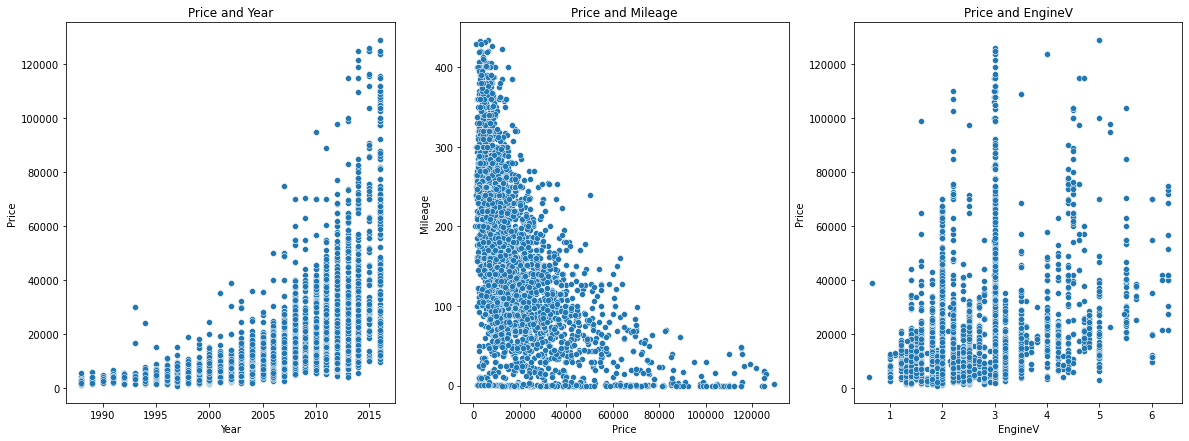

In [23]:
plt.figure(figsize=[20,7])
plt.subplot(1,3,1)
plt.title("Price and Year")
sns.scatterplot(x='Year',y='Price',data=fdata)

plt.subplot(1,3,2)
plt.title("Price and Mileage")
sns.scatterplot(x='Price',y='Mileage',data=fdata)

plt.subplot(1,3,3)
sns.scatterplot(y='Price',x='EngineV',data=fdata)
plt.title("Price and EngineV")

<AxesSubplot:xlabel='Price', ylabel='Density'>

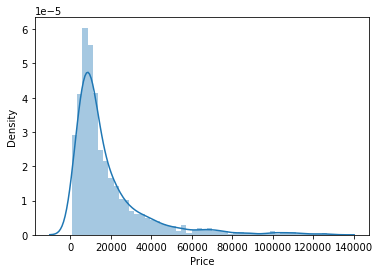

In [24]:
sns.distplot(fdata['Price'])

In [25]:
#price transformation with log since the graph corresponds to exponential
# Let's transform 'Price' with a log transformation
log_price = np.log(fdata['Price'])

# Then we add it to our data frame
fdata['log_price'] = log_price
fdata.head()

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,log_price
0,BMW,4200.0,sedan,277,2.0,Petrol,yes,1991,8.342840
1,Mercedes-Benz,7900.0,van,427,2.9,Diesel,yes,1999,8.974618
2,Mercedes-Benz,13300.0,sedan,358,5.0,Gas,yes,2003,9.495519
3,Audi,23000.0,crossover,240,4.2,Petrol,yes,2007,10.043249
4,Toyota,18300.0,crossover,120,2.0,Petrol,yes,2011,9.814656


# VISUALIZING LINEARITY WITH HELP OF SCATTER PLOTS

Text(0.5, 1.0, 'Log price and EngineV')

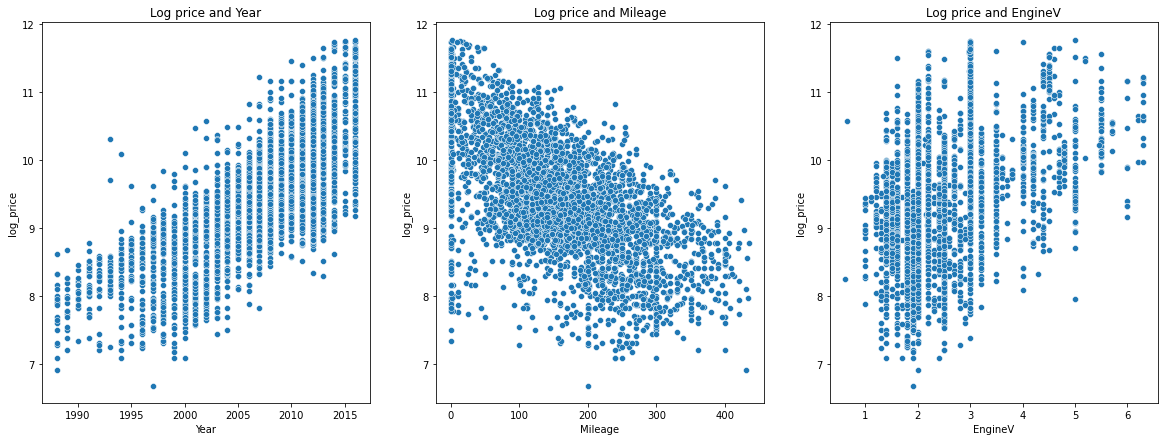

In [26]:
# Let's check the three scatters once again

plt.figure(figsize=[20,7])
plt.subplot(1,3,1)
plt.title("Log price and Year")
sns.scatterplot(x='Year',y='log_price',data=fdata)

plt.subplot(1,3,2)
plt.title("Log price and Mileage")
sns.scatterplot(y='log_price',x='Mileage',data=fdata)

plt.subplot(1,3,3)
sns.scatterplot(y='log_price',x='EngineV',data=fdata)
plt.title("Log price and EngineV")


The relationships show a clear linear relationship

# Converting categorical values into dummies

In [27]:
df2=pd.get_dummies(fdata['Brand'])

In [28]:
df2

,Audi,BMW,Mercedes-Benz,Mitsubishi,Renault,Toyota,Volkswagen
0,0,1,0,0,0,0,0
1,0,0,1,0,0,0,0
2,0,0,1,0,0,0,0
3,1,0,0,0,0,0,0
4,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...
3862,0,0,0,0,0,0,1
3863,0,0,0,0,0,1,0
3864,0,0,1,0,0,0,0
3865,0,1,0,0,0,0,0


In [29]:
df3=pd.get_dummies(fdata['Body'])
df4=pd.get_dummies(fdata['Engine Type'])
df5=pd.get_dummies(fdata['Registration'])

In [30]:
#removing price from fdata since we are using log_price
fdata1=fdata.drop('Price',axis=1)

In [31]:
fdata1.head()

,Brand,Body,Mileage,EngineV,Engine Type,Registration,Year,log_price
0,BMW,sedan,277,2.0,Petrol,yes,1991,8.342840
1,Mercedes-Benz,van,427,2.9,Diesel,yes,1999,8.974618
2,Mercedes-Benz,sedan,358,5.0,Gas,yes,2003,9.495519
3,Audi,crossover,240,4.2,Petrol,yes,2007,10.043249
4,Toyota,crossover,120,2.0,Petrol,yes,2011,9.814656


In [32]:
#since we dont have much use with year we also drop YEAR
fdata2=fdata1.drop('Year',axis=1)

In [33]:
final_data=fdata2

In [34]:
final_data.head()

,Brand,Body,Mileage,EngineV,Engine Type,Registration,log_price
0,BMW,sedan,277,2.0,Petrol,yes,8.342840
1,Mercedes-Benz,van,427,2.9,Diesel,yes,8.974618
2,Mercedes-Benz,sedan,358,5.0,Gas,yes,9.495519
3,Audi,crossover,240,4.2,Petrol,yes,10.043249
4,Toyota,crossover,120,2.0,Petrol,yes,9.814656


In [35]:
frames=[df2,df3,df4,df5]

In [36]:
result=pd.concat(frames,axis=1)
result.head()

,Audi,BMW,Mercedes-Benz,Mitsubishi,Renault,Toyota,Volkswagen,crossover,hatch,other,sedan,vagon,van,Diesel,Gas,Other,Petrol,no,yes
0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1
1,0,0,1,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,1
2,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1
3,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1
4,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,1


since we converted all catgorical values into boolean we can drop all categorical values

In [37]:
final_data1=final_data.drop('Brand',axis=1)
final_data2=final_data1.drop('Body',axis=1)
final_data3=final_data2.drop('Engine Type',axis=1)
final_data4=final_data3.drop('Registration',axis=1)

In [38]:
frames_1=[final_data4,result]
final_result=pd.concat(frames_1,axis=1)

In [39]:
final_result.head()

,Mileage,EngineV,log_price,Audi,BMW,Mercedes-Benz,Mitsubishi,Renault,Toyota,Volkswagen,...,other,sedan,vagon,van,Diesel,Gas,Other,Petrol,no,yes
0,277,2.0,8.342840,0,1,0,0,0,0,0,...,0,1,0,0,0,0,0,1,0,1
1,427,2.9,8.974618,0,0,1,0,0,0,0,...,0,0,0,1,1,0,0,0,0,1
2,358,5.0,9.495519,0,0,1,0,0,0,0,...,0,1,0,0,0,1,0,0,0,1
3,240,4.2,10.043249,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,1
4,120,2.0,9.814656,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,1


# PYTHON PACKAGES

In [40]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor

# LINEAR REGRESSION

Linear Regression was chosen as the first model due to its simplicity and comparatively small
training time. The features, without any feature mapping, were used directly as the feature vectors.
No regularization was used since the results clearly showed low variance.

# RANDOM FOREST

Random Forest is an ensemble learning based regression model. It uses a model called decision
tree, specifically as the name suggests, multiple decision trees to generate the ensemble model
which collectively produces a prediction. The benefit of this model is that the trees are produced in
parallel and are relatively uncorrelated, thus producing good results as each tree is not prone to
individual errors of other trees. This uncorrelated behavior is partly ensured by the use of Bootstrap
Aggregation or bagging providing the randomness required to produce robust and uncorrelated
trees. This model was hence chosen to account for the large number of features in the dataset and
compare a bagging technique with the following gradient boosting methods.


# GRADIENT BOOST

Gradient Boosting is another decision tree based method that is generally described as “a method
of transforming weak learners into strong learners”. This means that like a typical boosting method,
observations are assigned different weights and based on certain metrics, the weights of difficult to
predict observations are increased and then fed into another tree to be trained. In this case the
metric is the gradient of the loss function. This model was chosen to account for non-linear
relationships between the features and predicted price, by splitting the data into 100 regions.

# creating variables

In [41]:
x=final_result.drop('log_price',axis=1)
y=final_result['log_price']

# FEATURE SCALING

In [42]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(x[['Mileage','EngineV']])

StandardScaler()

In [43]:
# It is not usually recommended to standardize dummy variables
#For ML purposes we rarely put too much thought into it and go with the scale dummies as 
#scaling has no effect on their predictive power.
inputs_scaled = scaler.transform(x[['Mileage','EngineV']])
scaled_data = pd.DataFrame(inputs_scaled,columns=['Mileage','EngineV'])

In [44]:
input_scaled2 =scaled_data.join(x.drop(['Mileage','EngineV'],axis=1))

# TRAINING AND TESTING DATA

In [45]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(input_scaled2,y,test_size=0.2, random_state=365)

# LINEAR REGRESSION IMPLEMENTATION

In [46]:
# Model Building
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

# Training Model
lr.fit(x_train,y_train)

# Model Summary
y_pred_lr = lr.predict(x_test)

r_squared = r2_score(y_test,y_pred_lr)
rmse = np.sqrt(mean_squared_error(y_test,y_pred_lr))
print("R_squared :",r_squared)
print("RMSE :",rmse)

R_squared : 0.7726984972665856
RMSE : 0.4298206539563799


# RANDOM FOREST REGRESSION

In [47]:
# Model Building
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor()

# Training Model
rf.fit(x_train,y_train)

# Model Summary
y_pred_rf = rf.predict(x_test)

r_squared = r2_score(y_test,y_pred_rf)
rmse = np.sqrt(mean_squared_error(y_test,y_pred_rf))
print("R_squared :",r_squared)
print("RMSE :",rmse)

R_squared : 0.8172785517849648
RMSE : 0.38537265182996


# GBT Regressor Model

In [48]:
# Model Building
from sklearn.ensemble import GradientBoostingRegressor
gbt = GradientBoostingRegressor()

# Training Model
gbt.fit(x_train,y_train)

# Model Summary
y_pred_gbt = gbt.predict(x_test)

r_squared = r2_score(y_test,y_pred_gbt)
rmse = np.sqrt(mean_squared_error(y_test,y_pred_gbt))
print("R_squared :",r_squared)
print("RMSE :",rmse)


R_squared : 0.8134038120500443
RMSE : 0.38943726872400375


In [83]:
from sklearn import metrics

print('MAE:', metrics.mean_absolute_error(y_test, y_pred_gbt))
print('MSE:', metrics.mean_squared_error(y_test, y_pred_gbt))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred_gbt)))
z=np.sqrt(metrics.mean_squared_error(y_test, y_pred_gbt))
accuracy=1.96*z
print(accuracy*100)

MAE: 0.28465574893826345
MSE: 0.15166138627121192
RMSE: 0.38943726872400375
76.32970466990473


In [82]:
from sklearn import metrics

print('MAE:', metrics.mean_absolute_error(y_test, y_pred_lr))
print('MSE:', metrics.mean_squared_error(y_test, y_pred_lr))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred_lr)))
z=np.sqrt(metrics.mean_squared_error(y_test, y_pred_lr))
accuracy=1.96*z
print(accuracy*100)

MAE: 0.3157034379634969
MSE: 0.18474579456749007
RMSE: 0.4298206539563799
84.24484817545046


In [81]:
from sklearn import metrics

print('MAE:', metrics.mean_absolute_error(y_test, y_pred_rf))
print('MSE:', metrics.mean_squared_error(y_test, y_pred_rf))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred_rf)))
z=np.sqrt(metrics.mean_squared_error(y_test, y_pred_rf))
accuracy=1.96*z
print(accuracy*100)

MAE: 0.27296322032725306
MSE: 0.14851208077845557
RMSE: 0.38537265182996
75.53303975867216


In [54]:
#using the variables for cross validations
X= x_train.append(x_test)
X=X.values
y = np.concatenate([y_train,y_test])

# CROSS VALIDATIONS ON LINEAR REGRESSION

In [87]:

from sklearn.model_selection import KFold
kf = KFold(n_splits=10, random_state=None) 
arr=[]

for train_index, test_index in kf.split(X):
    x1, x2 = X[train_index], X[test_index]
    y1, y2 = y[train_index], y[test_index]
    
    lr = LinearRegression()
    lr.fit(x1, y1)
    y3 = lr.predict(x2)
    print('MAE:', metrics.mean_absolute_error(y2, y3))
    print('MSE:', metrics.mean_squared_error(y2, y3))
    print('RMSE:', np.sqrt(metrics.mean_squared_error(y2, y3)))
    z=np.sqrt(metrics.mean_squared_error(y2, y3))
    accuracy=1.96*z
    accuracy=accuracy*100
    arr.append(accuracy)
    print()
print("minium Accuracy=",min(arr))
print("maximum accuracy=",max(arr))

MAE: 0.33032578808201135
MSE: 0.23949934594109118
RMSE: 0.48938670388670263

MAE: 0.31874830607210375
MSE: 0.21053175425576748
RMSE: 0.4588373941340957

MAE: 0.32315265864308207
MSE: 0.19260914547315228
RMSE: 0.4388725845540506

MAE: 0.30847996624255547
MSE: 0.17651101664103933
RMSE: 0.42013214188043185

MAE: 0.28829773278216564
MSE: 0.16690753932807978
RMSE: 0.4085431915086577

MAE: 0.3086974492835946
MSE: 0.16573030643883854
RMSE: 0.40709987280621757

MAE: 0.3187762649886508
MSE: 0.2061545429951481
RMSE: 0.4540424462483085

MAE: 0.347189321178105
MSE: 0.20828484728434107
RMSE: 0.45638234769142977

MAE: 0.29592745305267026
MSE: 0.1572506078295788
RMSE: 0.39654836757901146

MAE: 0.3316064900736819
MSE: 0.2065553270570569
RMSE: 0.454483582824569

minium Accuracy= 77.72348004548626
maximum accuracy= 95.91979396179372


# CROSS VALIDATIONS ON RANDOM FOREST

In [88]:
from sklearn.model_selection import KFold
kf = KFold(n_splits=10, random_state=None) 
arr=[]

for train_index, test_index in kf.split(X):
    x1, x2 = X[train_index], X[test_index]
    y1, y2 = y[train_index], y[test_index]
    
    rf = RandomForestRegressor()
    rf.fit(x1, y1)
    y3 = rf.predict(x2)
    print('MAE:', metrics.mean_absolute_error(y2, y3))
    print('MSE:', metrics.mean_squared_error(y2, y3))
    print('RMSE:', np.sqrt(metrics.mean_squared_error(y2, y3)))
    z=np.sqrt(metrics.mean_squared_error(y2, y3))
    accuracy=1.96*z
    accuracy=accuracy*100
    arr.append(accuracy)
    print()
print("minium Accuracy=",min(arr))
print("maximum accuracy=",max(arr))

MAE: 0.28219235158171824
MSE: 0.17881849663764066
RMSE: 0.4228693611952049

MAE: 0.28374649767129995
MSE: 0.18393505986865766
RMSE: 0.42887650887948814

MAE: 0.28417095888155547
MSE: 0.16295678061304517
RMSE: 0.4036790564458914

MAE: 0.2734160401982713
MSE: 0.14313838032636167
RMSE: 0.37833633228433355

MAE: 0.2714986818700479
MSE: 0.16132366141044968
RMSE: 0.4016511688149926

MAE: 0.25360202056880765
MSE: 0.14260013769587604
RMSE: 0.3776243340886231

MAE: 0.28933117093214605
MSE: 0.1813722398247277
RMSE: 0.42587819834399565

MAE: 0.29031859536661575
MSE: 0.18129384626038558
RMSE: 0.4257861508555505

MAE: 0.2735769695032163
MSE: 0.14123228437289995
RMSE: 0.3758088402005732

MAE: 0.2791348711932225
MSE: 0.15604237700308807
RMSE: 0.39502199559402773

minium Accuracy= 73.65853267931234
maximum accuracy= 84.05979574037967


# CROSS VALIDATIONS ON GRADIENT BOOST

In [89]:
kf = KFold(n_splits=10, random_state=None) 
arr=[]

for train_index, test_index in kf.split(X):
    x1, x2 = X[train_index], X[test_index]
    y1, y2 = y[train_index], y[test_index]
    
    gbt = GradientBoostingRegressor()
    gbt.fit(x1, y1)
    y3 = gbt.predict(x2)
    print('MAE:', metrics.mean_absolute_error(y2, y3))
    print('MSE:', metrics.mean_squared_error(y2, y3))
    print('RMSE:', np.sqrt(metrics.mean_squared_error(y2, y3)))
    z=np.sqrt(metrics.mean_squared_error(y2, y3))
    accuracy=1.96*z
    accuracy=accuracy*100
    arr.append(accuracy)
    print()
print("minium Accuracy=",min(arr))
print("maximum accuracy=",max(arr))

MAE: 0.2963369819196351
MSE: 0.19134268055582426
RMSE: 0.43742734317349696

MAE: 0.2958472781986802
MSE: 0.17873283730592254
RMSE: 0.4227680656174524

MAE: 0.2932337041252326
MSE: 0.16136878254194895
RMSE: 0.40170733443882867

MAE: 0.2940522721853194
MSE: 0.16086609192947265
RMSE: 0.4010811537949305

MAE: 0.25596657659986277
MSE: 0.12998528451803437
RMSE: 0.3605347202670422

MAE: 0.2751154225315657
MSE: 0.14284212582052178
RMSE: 0.37794460681496933

MAE: 0.2924527245188233
MSE: 0.1759157121552217
RMSE: 0.4194230706043978

MAE: 0.3118169664854159
MSE: 0.17069459948301796
RMSE: 0.41315202950369

MAE: 0.2639240702804034
MSE: 0.12654658181899409
RMSE: 0.35573386375068944

MAE: 0.30621509975288486
MSE: 0.17094788924991833
RMSE: 0.41345844924238556

minium Accuracy= 69.72383729513513
maximum accuracy= 85.7357592620054
